In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import minmax_scale,LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [4]:
data = pd.read_csv("veri_setleri/kalp_rahatsizligi.csv",sep=",")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yas                     303 non-null    float64
 1   cinsiyet                303 non-null    object 
 2   gogus_agrisi_tipi       303 non-null    object 
 3   hareketsiz_kan_basinci  303 non-null    float64
 4   serum_kolestrol         303 non-null    float64
 5   aclik_kan_sekeri        303 non-null    int64  
 6   elektrokardiyografi     303 non-null    object 
 7   en_yuksek_kalp_hizi     303 non-null    float64
 8   anjin_bagli_egsersiz    303 non-null    int64  
 9   st_depresyonu           303 non-null    float64
 10  st_egimi                303 non-null    object 
 11  buyuk_damarlar          299 non-null    float64
 12  talasemi                301 non-null    object 
 13  kalp_rahatsizligi       303 non-null    int64  
dtypes: float64(6), int64(3), object(5)
memory 

In [5]:
data.head(3)

,yas,cinsiyet,gogus_agrisi_tipi,hareketsiz_kan_basinci,serum_kolestrol,aclik_kan_sekeri,elektrokardiyografi,en_yuksek_kalp_hizi,anjin_bagli_egsersiz,st_depresyonu,st_egimi,buyuk_damarlar,talasemi,kalp_rahatsizligi
0,63.0,erkek,tipik anjinal,145.0,233.0,1,sol ventikuler hipertrofi,150.0,0,2.3,asagi egimli,0.0,sabit defekt,0
1,67.0,erkek,asemptomatik,160.0,286.0,0,sol ventikuler hipertrofi,108.0,1,1.5,duz,3.0,normal,1
2,67.0,erkek,asemptomatik,120.0,229.0,0,sol ventikuler hipertrofi,129.0,1,2.6,duz,2.0,tersinir defekt,1


In [6]:
data.rename(columns={"gogus_agrisi_tipi":"gat",
"hareketsiz_kan_basinci":"hkb",
"serum_kolestrol":"kolestrol",
"aclik_kan_sekeri":"aks",
"elektrokardiyografi":"ekg",
"en_yuksek_kalp_hizi":"eykh",
"anjin_bagli_egsersiz":"abe",  
"st_depresyonu":"st_d",
"st_egimi":"ste",
"buyuk_damarlar":"bds"}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yas                303 non-null    float64
 1   cinsiyet           303 non-null    object 
 2   gat                303 non-null    object 
 3   hkb                303 non-null    float64
 4   kolestrol          303 non-null    float64
 5   aks                303 non-null    int64  
 6   ekg                303 non-null    object 
 7   eykh               303 non-null    float64
 8   abe                303 non-null    int64  
 9   st_d               303 non-null    float64
 10  ste                303 non-null    object 
 11  bds                299 non-null    float64
 12  talasemi           301 non-null    object 
 13  kalp_rahatsizligi  303 non-null    int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 33.3+ KB


Şu anda aşağıda veri önişleme adımları yapıalcak ilk önce eksik olan veriler problemi çözülecek.

In [7]:
imp = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
bds = data.iloc[:,[11]].values
tal = data.iloc[:,[12]].values
data["bds"]=imp.fit_transform(bds)
data["talasemi"]=imp.fit_transform(tal)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yas                303 non-null    float64
 1   cinsiyet           303 non-null    object 
 2   gat                303 non-null    object 
 3   hkb                303 non-null    float64
 4   kolestrol          303 non-null    float64
 5   aks                303 non-null    int64  
 6   ekg                303 non-null    object 
 7   eykh               303 non-null    float64
 8   abe                303 non-null    int64  
 9   st_d               303 non-null    float64
 10  ste                303 non-null    object 
 11  bds                303 non-null    float64
 12  talasemi           303 non-null    object 
 13  kalp_rahatsizligi  303 non-null    int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 33.3+ KB


In [11]:
le=LabelEncoder()
data["cinsiyet"]=le.fit_transform(data["cinsiyet"])
data["gat"]=le.fit_transform(data["gat"])
data["ekg"]=le.fit_transform(data["ekg"])
data["ste"]=le.fit_transform(data["ste"])
data["talasemi"]=le.fit_transform(data["talasemi"])


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yas                303 non-null    float64
 1   cinsiyet           303 non-null    int64  
 2   gat                303 non-null    int64  
 3   hkb                303 non-null    float64
 4   kolestrol          303 non-null    float64
 5   aks                303 non-null    int64  
 6   ekg                303 non-null    int64  
 7   eykh               303 non-null    float64
 8   abe                303 non-null    int64  
 9   st_d               303 non-null    float64
 10  ste                303 non-null    int64  
 11  bds                303 non-null    float64
 12  talasemi           303 non-null    int64  
 13  kalp_rahatsizligi  303 non-null    int64  
dtypes: float64(6), int64(8)
memory usage: 33.3 KB


Ayrkırı veriler sayısal verinin istatistik değerlerinden yararlanılarak bulunur. 

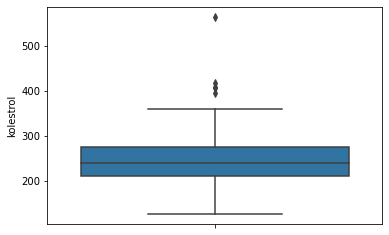

In [13]:
sns.boxplot(data=data,y="kolestrol")
plt.show()

In [14]:
data.kolestrol.describe()

count    303.000000
mean     246.693069
std       51.776918
min      126.000000
25%      211.000000
50%      241.000000
75%      275.000000
max      564.000000
Name: kolestrol, dtype: float64

In [19]:
q1=data.kolestrol.describe()[4]
q3=data.kolestrol.describe()[6]
iqr=q3-q1
min_k=q1-1.5*iqr
max_k=q3+1.5*iqr
min_k,max_k

(115.0, 371.0)

In [20]:
# pandas veri filtreleme
data=data[(data["kolestrol"]>=min_k)&(data["kolestrol"]<=max_k)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yas                298 non-null    float64
 1   cinsiyet           298 non-null    int64  
 2   gat                298 non-null    int64  
 3   hkb                298 non-null    float64
 4   kolestrol          298 non-null    float64
 5   aks                298 non-null    int64  
 6   ekg                298 non-null    int64  
 7   eykh               298 non-null    float64
 8   abe                298 non-null    int64  
 9   st_d               298 non-null    float64
 10  ste                298 non-null    int64  
 11  bds                298 non-null    float64
 12  talasemi           298 non-null    int64  
 13  kalp_rahatsizligi  298 non-null    int64  
dtypes: float64(6), int64(8)
memory usage: 34.9 KB


In [95]:
X = data.iloc[:,0:13].values
X= minmax_scale(X,feature_range=(0,1))
y = data.iloc[:,13].values

In [96]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=22)

In [102]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [103]:
# y_pred test verilerinden modelin verdiği cevaplardır
y_pred = knn.predict(x_test)

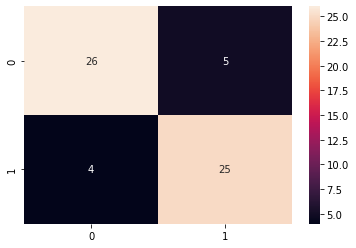

0.85


In [104]:
# y_pred ile y_test verilerini karşılaştıralım
cfm = confusion_matrix(y_true=y_test,y_pred=y_pred,labels=[0,1])
sns.heatmap(data=cfm,annot=True)
plt.show()
print(knn.score(x_test,y_test))

In [100]:
data.describe()

,yas,cinsiyet,gat,hkb,kolestrol,aks,ekg,eykh,abe,st_d,ste,bds,talasemi,kalp_rahatsizligi
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,54.302013,0.308725,1.040268,131.620805,243.479866,0.147651,1.466443,149.506711,0.328859,1.025168,1.402685,0.654362,0.825503,0.459732
std,9.038790,0.462744,0.871387,17.675160,45.063008,0.355350,0.525973,23.049244,0.470589,1.156392,0.618671,0.927324,0.955097,0.499214
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,0.000000,0.000000,120.000000,211.000000,0.000000,1.000000,133.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,0.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.650000,1.000000,0.000000,0.000000,0.000000
75%,60.750000,1.000000,1.000000,140.000000,273.750000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,360.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [101]:
for k in range(3,30):
    knn2=KNeighborsClassifier(n_neighbors=k)
    knn2.fit(x_train,y_train)
    skor=knn2.score(x_test,y_test)
    print(f"{k} komşu için accuracy={skor}")


3 komşu için accuracy=0.8
4 komşu için accuracy=0.8166666666666667
5 komşu için accuracy=0.7833333333333333
6 komşu için accuracy=0.8166666666666667
7 komşu için accuracy=0.8
8 komşu için accuracy=0.8
9 komşu için accuracy=0.8
10 komşu için accuracy=0.8
11 komşu için accuracy=0.8166666666666667
12 komşu için accuracy=0.8333333333333334
13 komşu için accuracy=0.8333333333333334
14 komşu için accuracy=0.8333333333333334
15 komşu için accuracy=0.8333333333333334
16 komşu için accuracy=0.8333333333333334
17 komşu için accuracy=0.8333333333333334
18 komşu için accuracy=0.85
19 komşu için accuracy=0.8333333333333334
20 komşu için accuracy=0.85
21 komşu için accuracy=0.8166666666666667
22 komşu için accuracy=0.8166666666666667
23 komşu için accuracy=0.8166666666666667
24 komşu için accuracy=0.8166666666666667
25 komşu için accuracy=0.8166666666666667
26 komşu için accuracy=0.8333333333333334
27 komşu için accuracy=0.8166666666666667
28 komşu için accuracy=0.8333333333333334
29 komşu için accu

In [109]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
skor_nb=gnb.score(x_test,y_test)
skor_bnb=bnb.score(x_test,y_test)
print(f"gausian nb={skor_nb}")
print(f"bernolulli nb={skor_bnb}")

0.85
0.8333333333333334


In [112]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
skor_svm=svm.score(x_test,y_test)
print(f"destek vektörleri={skor_svm}")

destek vektörleri=0.8166666666666667


In [118]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
skor_lr=lr.score(x_test,y_test)
print(f"lojistik regresyon ={skor_lr}")

lojistik regresyon =0.8166666666666667
